In [6]:
# Initial analysis to visualize the data
# Then explore the methods for using fia_stats, fia_sample_generation, and supp_modules

In [2]:
from glob import glob
import pprint
import geopandas as gpd
import pandas as pd
import folium
import numpy as np
datafiles = glob('/datadrive/fia/*.csv')
pp = pprint.PrettyPrinter(indent=4,compact=True)
pp.pprint(datafiles)

[   '/datadrive/fia/NRS_Annualized_Inventory_ActCoordinates_ChangMTA_200413.csv',
    '/datadrive/fia/Chang_2018_MOU_actual_plot_coords.csv',
    '/datadrive/fia/Chang_2018_MOU_actual_plot_coords_run_in_2019.csv',
    '/datadrive/fia/PNWRS_Annualized_Inventory_ActCoordinates_ChangMTA_200731.csv']


In [8]:
#subset by STATECD
statecd = pd.read_csv(glob('/datadrive/fia/supp_data/*.csv')[0])
df = gpd.read_file(datafiles[-1])
statecd = pd.read_csv(glob('/datadrive/fia/supp_data/*.csv')[0])
query = 'CA'
code = statecd[statecd['STATEAB']== query]['STATECD'].values[0]
subdf = df[df['STATECD']==str(code)]

In [9]:
fields = ['PLT_CN', 'INVYR', 'LAT', 'LON']
subdf = subdf.rename(columns={'ACTUAL_LAT':'LAT', 'ACTUAL_LON':'LON'})[fields]
subdf = subdf.astype({'LAT':'float', 'LON':'float', 'INVYR':'int32'})
subdf = gpd.GeoDataFrame(subdf, geometry=gpd.points_from_xy(subdf.LON, subdf.LAT))
subdf = subdf.set_crs(epsg=4326)

In [4]:
#gjson = subdf.to_crs(epsg='4326').iloc[:110].to_json()
xc = np.mean(subdf.LON)
yc = np.mean(subdf.LAT)

mapa = folium.Map(location=[yc, xc],zoom_start=4, tiles='CartoDB dark_matter')

import folium.plugins
marker_cluster = folium.plugins.MarkerCluster().add_to(mapa)
samplesize=999
for point in range(0, len(subdf[:samplesize])):
    folium.Marker(subdf.iloc[point][['LAT','LON']], popup=subdf['PLT_CN'].iloc[point]).add_to(marker_cluster)
#points = folium.features.GeoJson(gjson)

#mapa.add_child(points)
mapa

In [33]:
#looks good
#now let's sort by year and get all the data we can from the time period from 2004 to now

<AxesSubplot:xlabel='INVYR'>

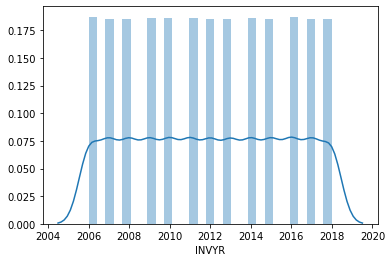

In [4]:
year_query = [2005, 2020]
subdf = subdf[(subdf['INVYR']>year_query[0]) & (subdf['INVYR']<=year_query[1])]

import seaborn as sns
sns.distplot(subdf.INVYR)

In [10]:
subdf

,PLT_CN,INVYR,LAT,LON,geometry
19953,40218205010497,2010,36.559327,-120.136011,POINT (-120.13601 36.55933)
19954,40218206010497,2010,36.589481,-119.854677,POINT (-119.85468 36.58948)
19955,40218207010497,2010,36.523922,-118.803712,POINT (-118.80371 36.52392)
19956,40218208010497,2010,36.554354,-118.479162,POINT (-118.47916 36.55435)
19957,40218209010497,2010,36.502029,-118.359839,POINT (-118.35984 36.50203)
...,...,...,...,...,...
57644,48203027010497,2011,33.734035,-117.340522,POINT (-117.34052 33.73403)
57645,48203028010497,2011,34.735323,-116.782671,POINT (-116.78267 34.73532)
57646,48203031010497,2011,34.249692,-116.769648,POINT (-116.76965 34.24969)
57647,48203039010497,2011,34.689458,-116.926009,POINT (-116.92601 34.68946)


In [6]:
#okay, now we can remove the duplicates or at least determine which plots have been resampled

In [3]:
import dask.dataframe as dd
plotfile='/datadrive/fia/supp_data/PLOT.zip'
#plot = dd.read_csv(plotfile, compression='zip')
plot = pd.read_csv(plotfile, compression='zip')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (26,37,46,64,67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
plot[(plot.INVYR>=2003) & (plot.INVYR<=2008)]

,CN,SRV_CN,CTY_CN,PREV_PLT_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,PLOT_STATUS_CD,...,MANUAL_NERS,MANUAL_RMRS,PAC_ISLAND_PNWRS,PLOT_SEASON_NERS,PRECIPITATION,PREV_MICROPLOT_LOC_RMRS,PREV_PLOT_STATUS_CD_RMRS,REUSECD1,REUSECD2,REUSECD3
46,22343419010478,22332802010478,407010478,4.338937e+13,2003,1,3,61,26,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,22343425010478,22332802010478,407010478,4.338983e+13,2003,1,3,61,25,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,22343434010478,22332802010478,407010478,4.743362e+13,2003,1,3,61,42,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,22343441010478,22332802010478,407010478,4.339107e+13,2003,1,3,61,7,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,22343446010478,22332802010478,407010478,4.339141e+13,2003,1,3,61,22,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721776,249636305010854,167263136010854,13163807010478,NaN,2004,78,3,30,300,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1721777,249636356010854,167263136010854,13163807010478,NaN,2004,78,3,30,301,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1721778,249636306010854,167263136010854,13163807010478,NaN,2004,78,3,30,302,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1721779,249636357010854,167263136010854,13163807010478,NaN,2004,78,3,30,304,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
s = np.unique(plot[(plot.INVYR>=2003) & (plot.INVYR<=2008)].STATECD)
statecd = pd.read_csv(glob('/datadrive/fia/supp_data/*.csv')[0])

In [1]:
s

NameError: name 's' is not defined

In [24]:
for cd in s:
    if len(statecd[statecd.STATECD==cd])!=0:
        print(statecd[statecd.STATECD==cd].STATENM)
        

0    Alabama
Name: STATENM, dtype: object
2    Alaska
Name: STATENM, dtype: object
4    Arizona
Name: STATENM, dtype: object
6    Arkansas
Name: STATENM, dtype: object
8    California
Name: STATENM, dtype: object
10    Colorado
Name: STATENM, dtype: object
12    Connecticut
Name: STATENM, dtype: object
14    Delaware
Name: STATENM, dtype: object
18    Florida
Name: STATENM, dtype: object
20    Georgia
Name: STATENM, dtype: object
24    Idaho
Name: STATENM, dtype: object
26    Illinois
Name: STATENM, dtype: object
28    Indiana
Name: STATENM, dtype: object
30    Iowa
Name: STATENM, dtype: object
32    Kansas
Name: STATENM, dtype: object
34    Kentucky
Name: STATENM, dtype: object
36    Louisiana
Name: STATENM, dtype: object
38    Maine
Name: STATENM, dtype: object
40    Maryland
Name: STATENM, dtype: object
42    Massachusetts
Name: STATENM, dtype: object
44    Michigan
Name: STATENM, dtype: object
46    Minnesota
Name: STATENM, dtype: object
48    Mississippi
Name: STATENM, dtype: obje

In [25]:
len(s)

53